# Ising Model - Peter Breslin 17340915

## Helpful Theory:

The energy for a pair of spins is an important feature in the Ising model. Here, a spin can only have 2 possible values, up (+1) or down (-1). The energy of the bond for two spins is lowest when both spins are aligned (ferromagnetic). This usally occurs at low temperatures. 

Spins begin to 'flip' as the temperature is increased and when the critical (or Curie) temperature for that material is reached, the spin orienation becomes completely random. The sample is then said to be in an anti-ferromagnetic (paramagnetic) state. 

A phase transition from ferromagnetic to anti-ferromagnetic (paramagnetic) can be investigated through this model. In the model, a spin $\sigma_i$ interacts with its $\textbf{nearest neighbour}$ only. Under this condition, the energy of a state can be written as: 

$$ E\,[s] = - \sum_{< ij >} J_{ij} \, \sigma_i \, \sigma_j - h \sum_{i} \sigma_i $$

where the first term sums over all nearest neighbour spin pairs $<ij>$ in the lattice while the second term sums over all of the lattice sites. J is the coupling strength through which the spins interact with each other through and h is a uniform external magnetic field. 

The model works by sweeping through the entire lattice spin-by-spin to generate a new state. At each site the Monte Carlo method is applied such that the simulation is run a set amount of times at every site. The change in energy $\Delta E$ is found for each spin $\textbf{if}$ it is flipped.

If $\Delta E<0$ the spin is accepted and flipped. If $\Delta E>0$ then it is accepted with probability $ e^{-\beta \Delta E} $. If the value of $\Delta E$ is greater than a randomly generated $\pm$1 then the spin is flipped.

### Calculating $\Delta E$ 

For a flip of spin $\sigma_i$, the change in its energy only depends on its nearest neighbours

$$ (\Delta E)_{\sigma_i \rightarrow \bar\sigma_i} = 2\,J \sigma_i \sum \sigma_j $$

starting simplication: $J_{ij} = J$


### Psudocode (kind of):

1) Initialise lattice and fill with spins ($\pm 1$).

2) Sweep: Flip the spin of a randomly chosen site over the entire lattice

3) The energy change, $\Delta E$ of this flip is calculated:

> If $\Delta E<0$       $\longrightarrow$ accept the flip and do (5)

> If $\Delta E>0$       $\longrightarrow$ is the probability $< e^{-\beta \Delta E}$?

> > YES                   $\longrightarrow$ accept flip and do (5)

> > NO                    $\longrightarrow$ don't accept flip and do (5)

4) This process is then repeated for each lattice site until the system reaches equilibrium.

5) Return the lattice and obtain results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def lattice(X,Y):
    return np.random.choice([-1,1], size=(X,Y))

#print(lattice(10,10))

In [4]:
#plot to visualise random spins in a 2D lattice
'''
plt.rcParams["figure.figsize"] = (15,10)
x = np.random.random(5000)
y = np.random.random(5000)
p = np.random.random(5000)
q = np.random.random(5000)

plt.scatter(x, y, c='b', alpha=0.5, linewidth=0.2, marker=("^"), label = "Spin-Up")
plt.scatter(p, q, c='r', alpha=0.5, linewidth=0.2, marker=("v"), label = "Spin-Down")
plt.legend()

plt.show()
'''

'\nplt.rcParams["figure.figsize"] = (15,10)\nx = np.random.random(5000)\ny = np.random.random(5000)\np = np.random.random(5000)\nq = np.random.random(5000)\n\nplt.scatter(x, y, c=\'b\', alpha=0.5, linewidth=0.2, marker=("^"), label = "Spin-Up")\nplt.scatter(p, q, c=\'r\', alpha=0.5, linewidth=0.2, marker=("v"), label = "Spin-Down")\nplt.legend()\n\nplt.show()\n'

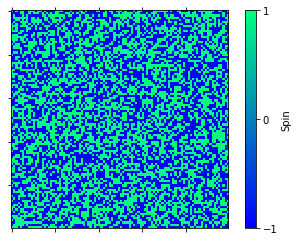

In [5]:
#can also use matshow for a good representation  
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(lattice(100,100), interpolation='nearest', cmap='winter')
fig.colorbar(cax, ticks=range(-1,2), label='Spin')

ax.set_xticklabels([''],  visible=False)
ax.set_yticklabels([''],  visible=False)
  
plt.show()

#plt.matshow(lattice(1000,1000))

In [8]:
''' Some of this code was adapted from Prof. Rajesh Singh ----> https://github.com/rajeshrinet '''

class Ising_model(): 
    
    def algorithm(self, sweep, K, B):     # algorithm for the Monte Carlo method by using the Metropolis algorithm
        for i in range(K):                # B = beta --> this encodes the inverse temperature (parameter for temp)
            for j in range(K):            
                n = np.random.randint(0, K)
                m = np.random.randint(0, K) 
                spin = sweep[n, m]
                
                # applying boundary conditions --> % allows it to loop around (periodic boundary condition)
                nearest_neighbours = sweep[(n+1)%K, m] + sweep[n, (m+1)%K] + sweep[(n-1)%K, m] + sweep[n, (m-1)%K]
                
                # must calculate the energy difference --> point spin TIMES the SUM of all neighbouring point spins
                dE = 2 * spin * nearest_neighbours  #dE = energy difference
                
                # if energy is less than zero --> accept the change
                if dE < 0:         
                    spin *= -1
                
                # Otherwise, accept with the probability:
                
      #          elif dE > 0 and np.random.rand() < np.exp(-B * dE):
      #             spin *= -1
                    
                elif np.random.rand() < np.exp(-B * dE):
                    spin *= -1

                sweep[n, m] = spin
        return sweep
    
# Now for implementing the algorithm to carry out the simulation of the Ising Model:

    def simulation(self): 
        K = 64     #64x64 lattice
        T = 0.4    #T = temperature
        sweep = 2 * np.random.randint(2, size=(K,K))-1   # picking a random spin state for the initial conditions
        f = plt.figure(figsize=(15, 15));
        self.algorithmPlot(f, sweep, 0, K, 1);

# Setting the simulation to go through 1000 iterations and taking 'snaps' of the model at arbitrarily picked times
        iterations = 1001
        for i in range(iterations):
            self.algorithm(sweep, K, 1.0/T)
            if i == 1:       self.algorithmPlot(f, sweep, i, K, 2);   # at time = 1 second
            if i == 5:       self.algorithmPlot(f, sweep, i, K, 3);   # at time = 5 seconds
            if i == 40:      self.algorithmPlot(f, sweep, i, K, 4);   # at time = 40 seconds
            if i == 150:     self.algorithmPlot(f, sweep, i, K, 5);   # at time = 150 seconds
            if i == 1000:    self.algorithmPlot(f, sweep, i, K, 6);   # at time = 1000 seconds

# Now to plot each 'snap' of the model
    def algorithmPlot(self, f, sweep, i, K, number):
        X, Y = np.meshgrid(range(K), range(K))
        subplot =  f.add_subplot(3, 3, number)     
        plt.pcolormesh(X, Y, sweep, cmap=plt.cm.winter);
        plt.title('Time = %d'%i) 
        plt.setp(subplot.get_yticklabels(), visible=False)
        plt.setp(subplot.get_xticklabels(), visible=False)   
    plt.show()

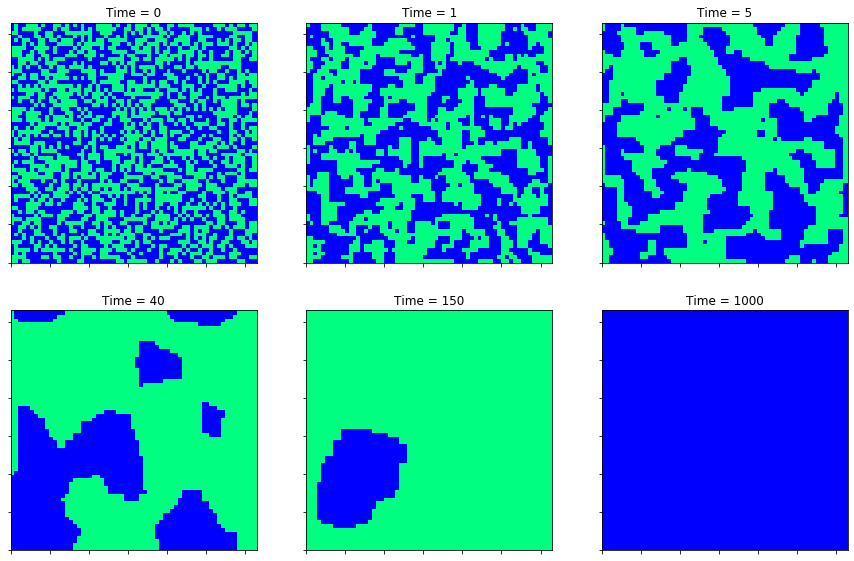

In [9]:
ising = Ising_model()
ising.simulation()

## Visualising the change in certain parameters - Energy, Magnetisation, Specific Heat, Susceptibility

In [10]:
# Defining a seperate algorithm to perform the Monte Carlo - Metropolis operations

def mcm_algo(sweep, B):                     # B = beta --> this encodes the inverse temperature (parameter for temp)
        for i in range(K):                
            for j in range(K):            
                n = np.random.randint(0, K)
                m = np.random.randint(0, K) 
                spin = sweep[n, m]
                
                # applying boundary conditions --> % allows it to loop around (periodic boundary condition)
                nearest_neighbours = sweep[(n+1)%K, m] + sweep[n, (m+1)%K] + sweep[(n-1)%K, m] + sweep[n, (m-1)%K]
                
                # must calculate the energy difference --> point spin TIMES the SUM of all neighbouring point spins
                dE = 2 * spin * nearest_neighbours  #dE = energy difference
                
                # if energy is less than zero --> accept the change
                if dE < 0:         
                    spin *= -1
                
                # Otherwise, accept with the probability:
                
      #          elif dE > 0 and np.random.rand() < np.exp(-B * dE):
      #             spin *= -1
                    
                elif np.random.rand() < np.exp(-B * dE):
                    spin *= -1

                sweep[n, m] = spin
        return sweep

In [11]:
# To get the ENERGY of a given lattice configuration
def energy_calc(sweep):  
    energy = 0
    for i in range(len(sweep)):
        for j in range(len(sweep)):
            spin = sweep[i,j]
            nearest_neighbours = sweep[(i+1)%K, j] + sweep[i,(j+1)%K] + sweep[(i-1)%K, j] + sweep[i,(j-1)%K] # periodic boundary conditions
            energy += spin * -nearest_neighbours
    return energy / 4

# To get the MAGNETISATION of a given lattice configuration
def mag_calc(sweep):
    magnetisation = np.sum(sweep)
    return magnetisation

In [12]:
#Setting the parameters
K = 25                         # 25x25 lattice
temp_no = 100                  # the number of temperature points
steps = 1024                   # the number of algorithm sweeps
equilibrium = 1024             # the number of algorithm sweeps for equilibrium to be reached

Temp = np.linspace(1.5, 3.5, temp_no); 

# Now to set up the parameters
E = np.zeros(temp_no)   # E = Energy
M = np.zeros(temp_no)   # M = magnetisation
C = np.zeros(temp_no)   # C = specific heat
S = np.zeros(temp_no)   # S = magnetic susceptibility ---> measure of how much a material will become magnetized by when placed in an applied mag field

# Want the intensive values of the system, so divide by no. of samples and the system size
# Intensive values ---> doesn't depend on the amount of material in the system or the system size (eg. temperature!) 
iv_1 = 1 / (K * K * steps)
iv_2 = 1 / (K * K * steps**2) 

In [13]:
''' Some of this code was adapted from Prof. Rajesh Singh ----> https://github.com/rajeshrinet '''

# Need to set the initial state of the lattice
def initial_spin_state(K):   
    iss = 2 * np.random.randint(2, size=(K,K))-1
    return iss

for tt in range(temp_no):
    E1 = E2 = M1 = M2 = 0
    sweep = initial_spin_state(K)
    iTemp = 1.0/Temp[tt]
    iTemp_2 = iTemp**2
    
    for i in range(equilibrium):          # equilibrating the lattice
        mcm_algo(sweep, iTemp)            # using the previously defined algorithm to perform the Monte Carlo - Metropolis algo

# Now to calculate the Energy and Magnetisation
    for i in range(steps):
        mcm_algo(sweep, iTemp)           
        Energy = energy_calc(sweep)        
        Magnetisation = mag_calc(sweep)    

        E1 = E1 + Energy
        E2 = E2 + Energy**2
        M1 = M1 + Magnetisation
        M2 = M2 + Magnetisation**2 
        
    E[tt] = iv_1 * E1
    M[tt] = iv_1 * M1
    C[tt] = (iv_1 * E2 - iv_2 * E1 * E1) * iTemp_2
    S[tt] = (iv_1 * M2 - iv_2 * M1 * M1) * iTemp

### Plots

Text(0.5, 0, 'Temperature (J/$k_b$)')

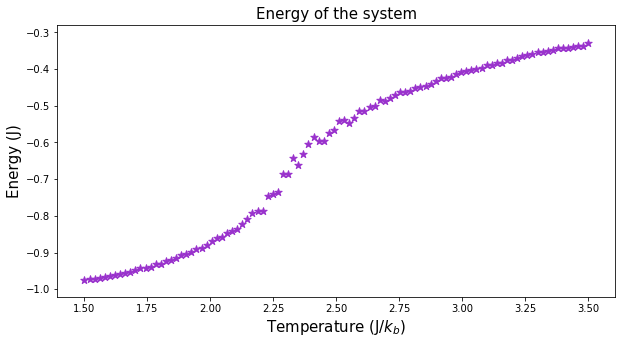

In [18]:
#Energy
plt.figure(figsize=(10,5))
plt.scatter(Temp, E, s=60, marker='*', color='darkorchid')
plt.title('Energy of the system' , fontsize=15)
plt.ylabel('Energy (J)', fontsize=15)
plt.xlabel('Temperature (J/$k_b$)' , fontsize=15)
#plt.savefig('energy2.png')

Text(0.5, 0, 'Temperature (J/$k_B$)')

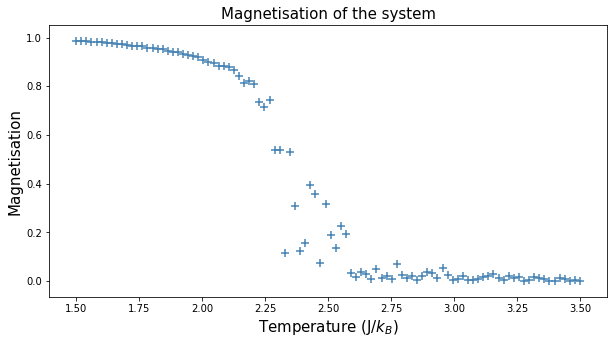

In [19]:
#Magnetisation
plt.figure(figsize=(10,5))
plt.scatter(Temp, abs(M), s=60, marker='+', color='steelblue')
plt.title('Magnetisation of the system' , fontsize=15)
plt.ylabel('Magnetisation', fontsize=15)
plt.xlabel('Temperature (J/$k_B$)' , fontsize=15)
#plt.savefig('mag2.png')

Text(0.5, 0, 'Temperature (J/$k_B$)')

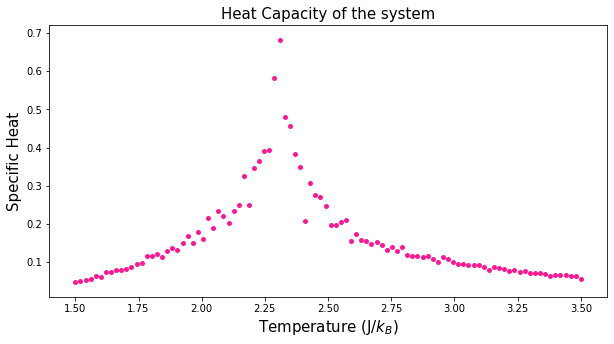

In [20]:
#Heat Capacity
plt.figure(figsize=(10,5))
plt.scatter(Temp, C, s=60, marker='.', color='deeppink')
plt.title('Heat Capacity of the system', fontsize=15) 
plt.ylabel('Specific Heat', fontsize=15)
plt.xlabel('Temperature (J/$k_B$)' , fontsize=15)
#plt.savefig('heat_cap2.png')

Text(0.5, 0, 'Temperature (J/$k_b$)')

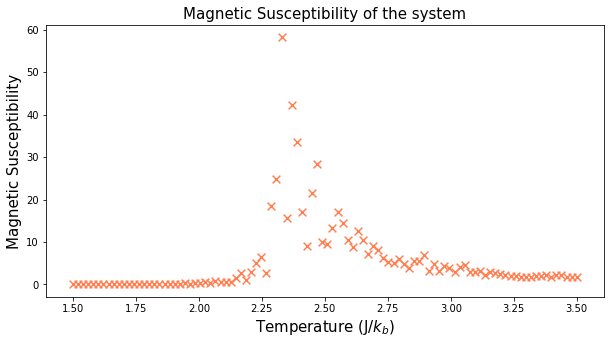

In [21]:
#Magnetic Susceptibility
plt.figure(figsize=(10,5))
plt.scatter(Temp, S, s=60, marker='x', color='coral')
plt.title('Magnetic Susceptibility of the system', fontsize=15) 
plt.ylabel('Magnetic Susceptibility', fontsize=15)
plt.xlabel('Temperature (J/$k_b$)' , fontsize=15)
#plt.savefig('mag_sus2.png')